# Exploratory Data Analysis - CO2 Emissions

This notebook explores the dataset used project. The goal is to understand the data's structure, identify patterns, check for missing values, and analyze the relationships between the features and the target variable, `ewltp_(g/km)`. This analysis will help justify the preprocessing and modeling decisions made.

**Note: All Procedures will be done in the same way of the main codes and notebook of this project.**

## 1. Setting up libraries and the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/data.csv")
print('Data  loaded succesfully!')

Data  loaded succesfully!


## 2. Initial data review 

In [3]:
print(f"Dataset Shape: {df.shape}")
print("\n *** Data Info ***")
df.info()
print("\n *** First Rows of Data ***")
df.head()

Dataset Shape: (526170, 40)

 *** Data Info ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526170 entries, 0 to 526169
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    526170 non-null  int64  
 1   Country               526170 non-null  object 
 2   VFN                   526170 non-null  object 
 3   Mp                    511547 non-null  object 
 4   Mh                    526170 non-null  object 
 5   Man                   526170 non-null  object 
 6   MMS                   0 non-null       float64
 7   Tan                   526170 non-null  object 
 8   T                     526170 non-null  object 
 9   Va                    526170 non-null  object 
 10  Ve                    526170 non-null  object 
 11  Mk                    526170 non-null  object 
 12  Cn                    526166 non-null  object 
 13  Ct                    526170 non-null  object 
 14  Cr  

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,ech,RLFI,Electric range (km)
0,158381926,PL,IP-0218-JT1,SUBARU-MAZDA-TOYOTA,TOYOTA MOTOR CORPORATION,TOYOTA MOTOR CORPORATION,NaN,e6*2018/858*00295*00,AYH1(M),MAYH10(W),...,NaN,NaN,NaN,P,2024,2024-05-29,4.5,EURO 6 EA,NaN,NaN
1,158381927,PL,IP-0211-JT1,SUBARU-MAZDA-TOYOTA,TOYOTA MOTOR CORPORATION,TOYOTA MOTOR CORPORATION,NaN,e6*2018/858*00294*01,AX2T(M),ZYX20(H),...,NaN,NaN,NaN,P,2024,2024-11-19,3.6,EURO 6 EA,NaN,NaN
2,158381928,PL,IP-MQB37WZ_A3_1233-WVW,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,e1*2007/46*2180*16,CDV,ACDXDEX0,...,NaN,NaN,NaN,P,2024,2024-10-24,5.4,EURO 6 EA,NaN,NaN
3,158381929,PL,IP-JLA1MUP001A_001-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e6*2018/858*00003*15,RJL,LH2,...,NaN,NaN,NaN,P,2024,2024-03-27,7.0,EURO 6 EA,NaN,NaN
4,158381930,PL,IP-JBA1M6PJT4A_001-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,e2*2007/46*0684*24,RJB,HE2,...,NaN,NaN,NaN,P,2024,2024-03-20,5.5,EURO 6 AP,NaN,NaN


## 3.Cleaning the name of columns and categorical values

In order to be consistant we clean the columnt names and categorical values by converting them into lower case and replacing whitespace with "_".

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

## 4. Target variable analysis: `ewltp_(g/km)`

Let's analyze the target variable for our regression task.

--- Target Variable: ewltp_(g/km)
Missing values: 0
--- Descriptive Statistics
count    526170.000000
mean        134.084444
std          27.471666
min          10.000000
25%         117.000000
50%         130.000000
75%         147.000000
max         250.000000
Name: ewltp_(g/km), dtype: float64


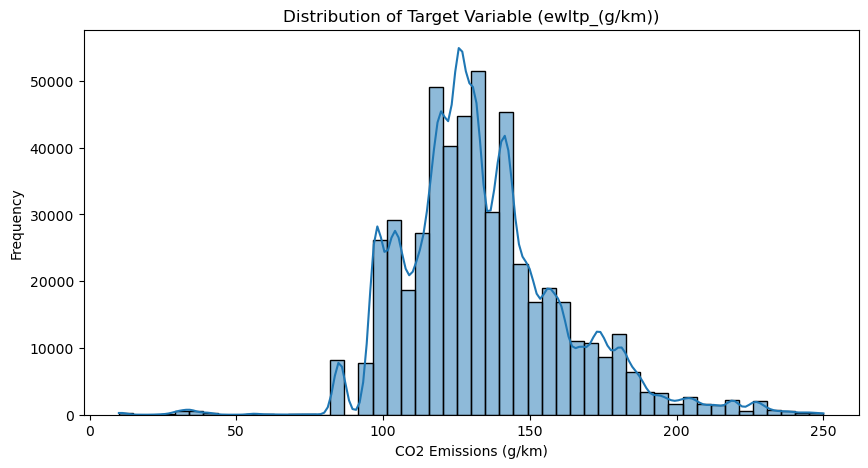

In [5]:
target = 'ewltp_(g/km)'
    
print(f"--- Target Variable: {target}")
print(f"Missing values: {df[target].isnull().sum()}")

print("--- Descriptive Statistics")
print(df[target].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df[target], kde=True, bins=50)
plt.title('Distribution of Target Variable (ewltp_(g/km))')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

**Observation:**
* The target variable has no missing values.
* The distribution is right-skewed, with a long tail of high-emission vehicles. A log transformation could be considered, but tree-based models like LightGBM are generally robust to skewed data.

## 5. Feature selection & cleaning

We'll replicate the feature selection and cleaning from the original notebook to create the final `select_df` for analysis. This focuses our EDA on the exact data used for modeling.

In [6]:
df.columns

Index(['id', 'country', 'vfn', 'mp', 'mh', 'man', 'mms', 'tan', 't', 'va',
       've', 'mk', 'cn', 'ct', 'cr', 'r', 'm_(kg)', 'mt', 'enedc_(g/km)',
       'ewltp_(g/km)', 'w_(mm)', 'at1_(mm)', 'at2_(mm)', 'ft', 'fm',
       'ec_(cm3)', 'ep_(kw)', 'z_(wh/km)', 'it', 'ernedc_(g/km)',
       'erwltp_(g/km)', 'de', 'vf', 'status', 'year', 'date_of_registration',
       'fuel_consumption_', 'ech', 'rlfi', 'electric_range_(km)'],
      dtype='object')

In [7]:
nan_cols = ['mms', 'ernedc_(g/km)', 'electric_range_(km)', 'vf', 'enedc_(g/km) ', 'at2_(mm)', 'at1_(mm)',
    'w_(mm)', 'rlfi', 'de', 'z_(wh/km)', 'it', 'erwltp_(g/km)', 'enedc_(g/km)']

df_cleaned = df[[col for col in df.columns if col not in nan_cols]]

features = ['mk', 'ech', 'ft', 'fm', 'm_(kg)', 'mt', 'ec_(cm3)', 'ep_(kw)', 'fuel_consumption_']

categorical_columns = [col for col in categorical_columns if col in features]

target = 'ewltp_(g/km)'

select_df = df_cleaned[features + [target]].copy()

numerical_features = ['m_(kg)', 'mt', 'ec_(cm3)', 'ep_(kw)', 'fuel_consumption_']

# Apply the same spelling corrections for 'mk' (make)
spelling_mappings = {
    'toyota/carpol' : 'toyota',
    'renault/carpol' : 'renault',
    'toyota/steeler' : 'toyota',
    'opel/carpol' : 'opel',
    'mercedes-amg' : 'mercedes-benz',
    'peugeot/carpol' : 'peugeot',
    'volkswageb' : 'volkswagen',
    'ford/fc_auto_system' : 'ford',
    'citroen/carpol' : 'citroen',
    'allied_vehicles_ltd.' : 'allied_vehicles_ltd',
    'volkswagen/v-van' : 'volkswagen',
    'cms_auto/mercedes-benz' : 'mercedes-benz',
    'ford_transit/frank-cars' : 'ford_transit',
    'ssangyong_kg_mobility' : 'ssangyong',
    'mercedes/v-van' : 'mercedes-benz',
    'ford/germaz' : 'ford',
    'volkswagen_amz_kutno' : 'volkswagen',
    'ford/frank-cars' : 'ford',
    'ford_transit/its_system' : 'ford_transit',
    'volkswagen/carpol' : 'volkswagen',
    'nisssan' : 'nissan',
    'fiat/carpol' : 'fiat',
    'volkswagen/zimny' : 'volkswagen',
    'mercedes-benz/mrc' : 'mercedes-benz',
    'ssang_yong' : 'ssangyong',
    'ford/auto_galeria' : 'ford',
    'alpina' : 'bmw',
    'suzki' : 'suzuki',
    'man/carpol' : 'man',
    'renault_/_multitel' : 'renault',
    'nissa' : 'nissan',
    'opek' : 'opel',
    'volkswage._vw' : 'volkswagen',
    'lexsus' : 'lexus',
    'mercede-benz': 'mercedes-benz',
    'ssangyong_kg_mobitity' : 'ssangyong',
    'mercedes' : 'mercedes-benz',
    'mercedes-benz/cms-auto' : 'mercedes-benz',
    'volkswagen/mobilcar' : 'volkswagen',
    'jaeccoo' : 'jaecoo',
    'ford_transit/auto_galeria' : 'ford_transit',
    'volkswagen/mrc' : 'volkswagen',
    'ssang-young' : 'ssangyong',
    'porche' : 'porsche',
    'omoda5' : 'omoda',
    'mag' : 'mg'
}

select_df['mk'] = select_df['mk'].replace(spelling_mappings)

print("Final selected DataFrame for analysis (select_df):")
select_df.head()

Final selected DataFrame for analysis (select_df):


,mk,ech,ft,fm,m_(kg),mt,ec_(cm3),ep_(kw),fuel_consumption_,ewltp_(g/km)
0,lexus,euro_6_ea,petrol,h,1388,1426.0,1490.0,67.0,4.5,100
1,toyota,euro_6_ea,petrol,m,1539,1586.0,1798.0,72.0,3.6,102
2,volkswagen,euro_6_ea,petrol,h,1403,1539.0,1498.0,85.0,5.4,123
3,renault,euro_6_ea,petrol,h,1537,1616.0,1598.0,69.0,7.0,107
4,renault,euro_6_ap,petrol,m,1328,1334.0,999.0,67.0,5.5,126


## 6. Numerical Feature Analysis

--- Descriptive Statistics (Numerical Features)
              m_(kg)             mt       ec_(cm3)        ep_(kw)  \
count  526170.000000  525419.000000  526143.000000  526150.000000   
mean     1567.320187    1628.463653    1675.237827     113.040422   
std       308.772988     310.921477     470.906965      44.666501   
min       700.000000     615.000000     998.000000      46.000000   
25%      1367.000000    1416.000000    1482.000000      81.000000   
50%      1513.000000    1581.000000    1499.000000     110.000000   
75%      1705.000000    1781.000000    1984.000000     131.000000   
max      3062.000000    3274.000000    6498.000000     607.000000   

       fuel_consumption_  
count      526170.000000  
mean            5.434774  
std             1.541779  
min             0.300000  
25%             4.900000  
50%             5.300000  
75%             6.100000  
max            26.000000  

--- Missing Values (Numerical Features)
m_(kg)                 0
mt                   

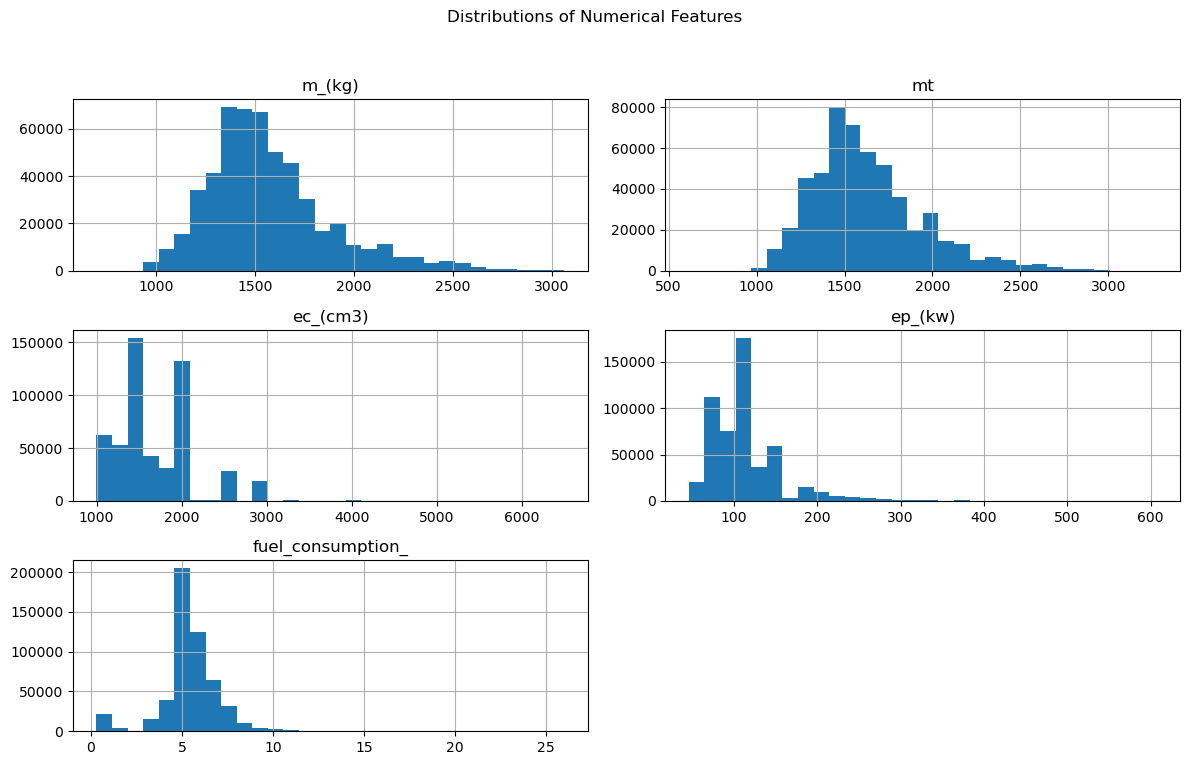

In [8]:
print("--- Descriptive Statistics (Numerical Features)")
print(select_df[numerical_features].describe())

print("\n--- Missing Values (Numerical Features)")
print(select_df[numerical_features].isnull().sum())

select_df[numerical_features].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distributions of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observations:**
* `mt`, `ec_(cm3)`, and `ep_(kw)` have some missing values. Which will be filled with `SimpleImputer(strategy='median')` in the designated pipeline.
* The features have very different scales and distributions (e.g., `m_(kg)` is in thousands, `ep_(kw)` is mostly under 200). This strongly justifies using `StandardScaler`.

### Correlation Analysis

--- Correlation with Target
ewltp_(g/km)         1.000000
ep_(kw)              0.675871
mt                   0.609657
m_(kg)               0.597639
fuel_consumption_    0.442132
ec_(cm3)             0.407958
Name: ewltp_(g/km), dtype: float64


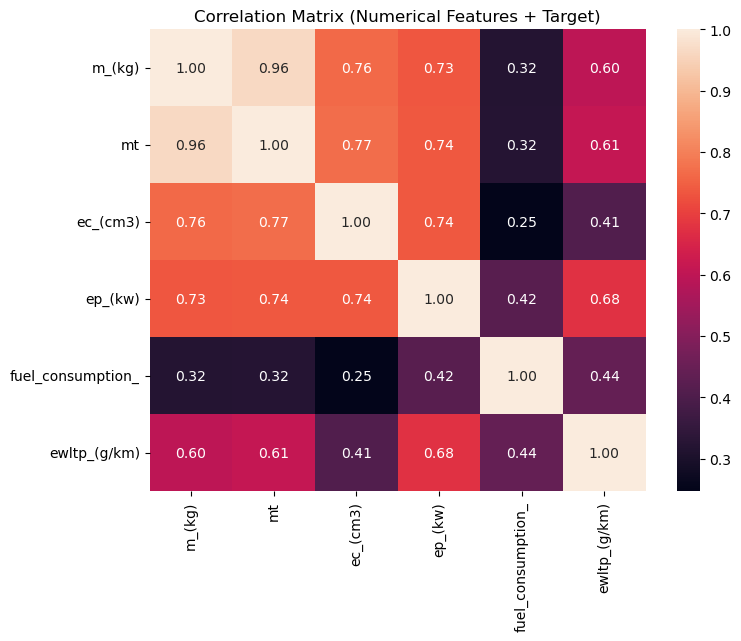

In [9]:
corr_matrix = select_df[numerical_features + [target]].corr(numeric_only=True)

print("--- Correlation with Target")
print(corr_matrix[target].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix (Numerical Features + Target)')
plt.show()

Plotting pairplot with a sample of 5000 data points...


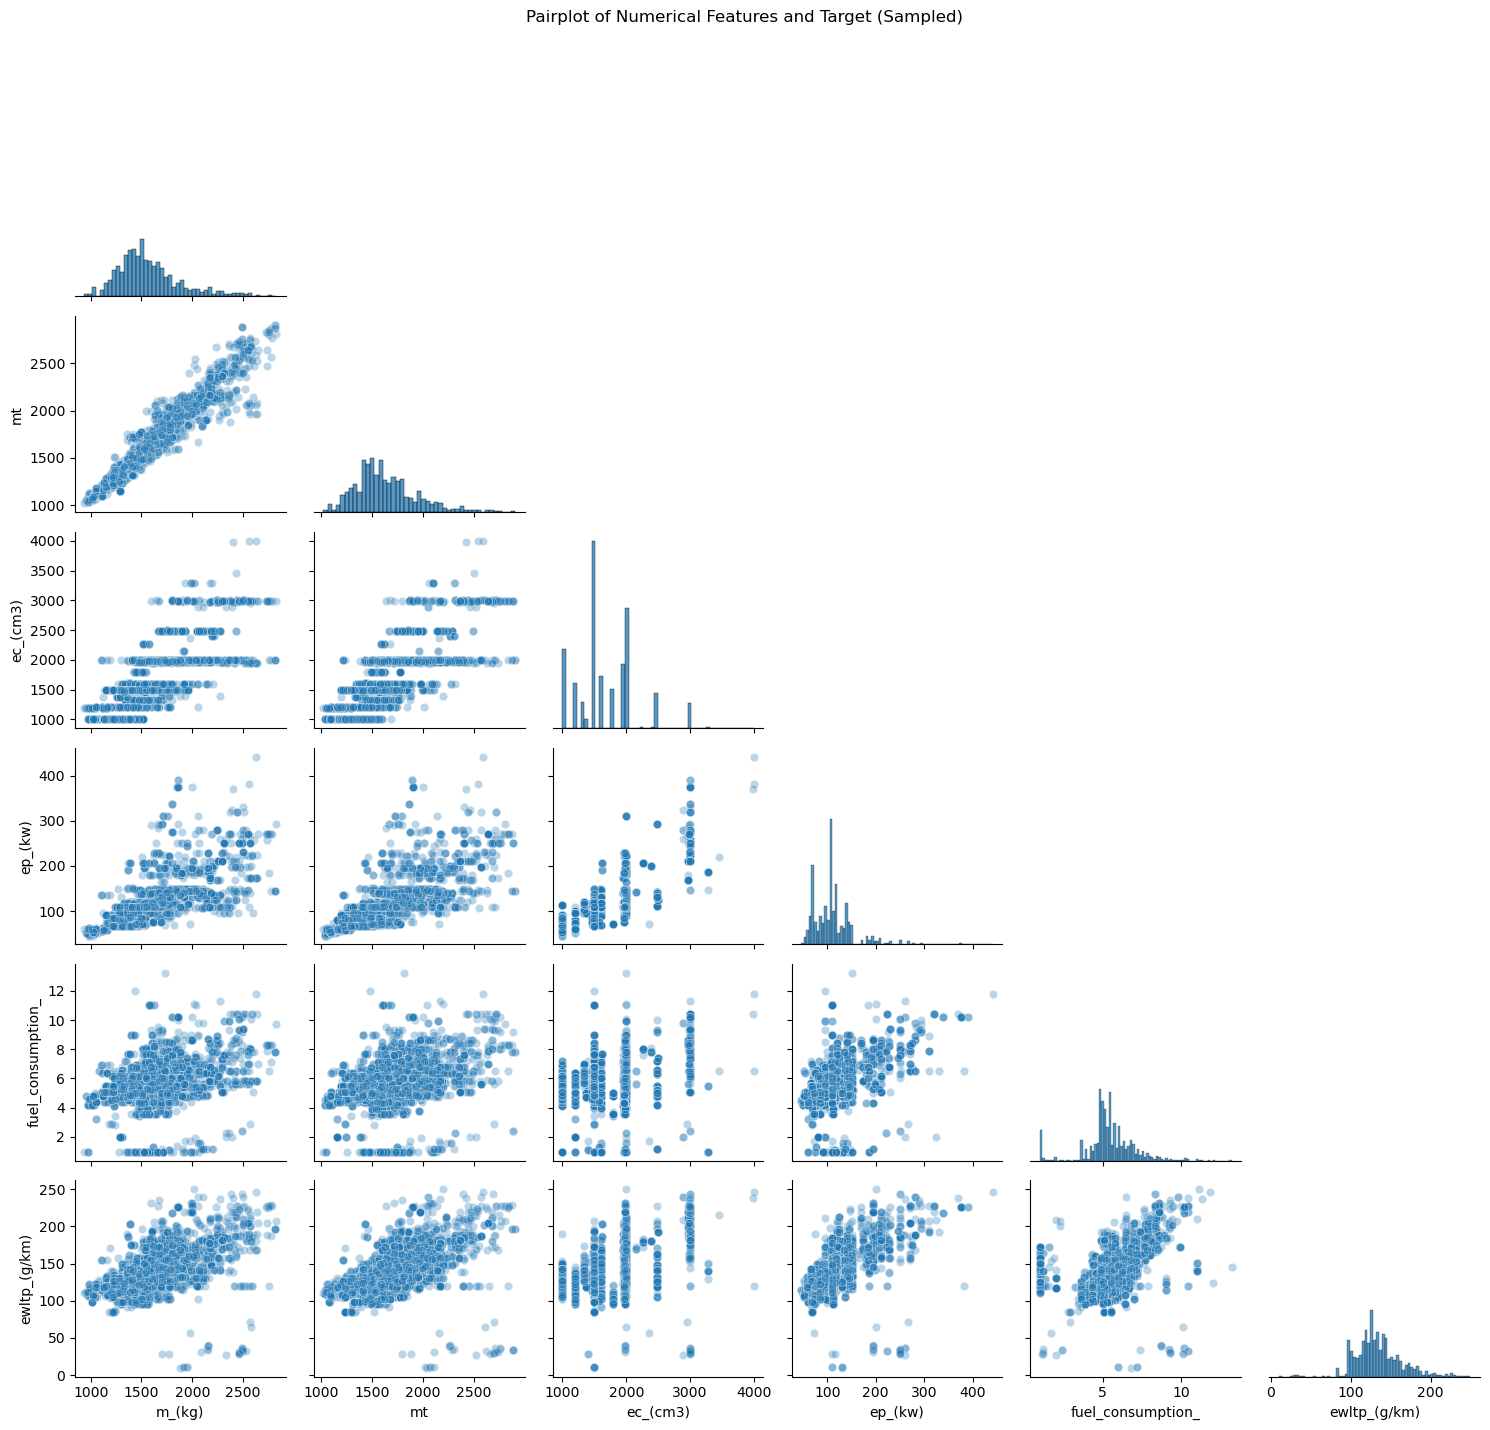

In [10]:
# We use a sample to speed up plotting, as 500k+ points is too much
print("Plotting pairplot with a sample of 5000 data points...")
sample_df = select_df.sample(n=min(5000, len(select_df)), random_state=1)

sns.pairplot(sample_df[numerical_features + [target]].dropna(), 
                kind='scatter', 
                corner=True, 
                plot_kws={'alpha': 0.3})
plt.suptitle('Pairplot of Numerical Features and Target (Sampled)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observations:**
* `ep_(kw)` (engine power) and `ec_(cm3)` (engine capacity) have the strongest positive correlation with emissions, which makes perfect sense. Bigger, more powerful engines typically emit more CO2.
* `m_(kg)` (mass) and `mt` (technical mass) also show a strong positive correlation with the target. Heavier cars require more energy to move. Same as `fuel_consumption`. 
* The features are also highly correlated with each other (e.g., `ep_(kw)` and `ec_(cm3)`), which is expected.

## 7. Categorical Feature Analysis

In [11]:
categorical_features = ['mk', 'ft', 'fm', 'ech']
    
print("--- Missing Values (Categorical Features)")
print(select_df[categorical_features].isnull().sum())

print("\n--- Cardinality (Unique Values)")
print(select_df[categorical_features].nunique())

print("\n--- Value Counts (Top 5)")
for col in categorical_features:
    print(f"\n-- {col}")
    print(select_df[col].value_counts().head(5))


--- Missing Values (Categorical Features)
mk      0
ft      0
fm      0
ech    11
dtype: int64

--- Cardinality (Unique Values)
mk     51
ft      5
fm      4
ech    17
dtype: int64

--- Value Counts (Top 5)

-- mk
mk
toyota        102650
skoda          59837
volkswagen     37462
kia            32213
hyundai        30485
Name: count, dtype: int64

-- ft
ft
petrol             426273
diesel              79917
lpg                 17178
petrol/electric      2770
diesel/electric        32
Name: count, dtype: int64

-- fm
fm
m    308571
h    197621
b     17176
p      2802
Name: count, dtype: int64

-- ech
ech
euro_6_ea    298111
euro_6_ap    213306
euro_6_eb      7963
euro_6_ec      6618
euro_6_ar        57
Name: count, dtype: int64


**Observations:**
* `ech` has 11 missing values. This justifies the `SimpleImputer(strategy='most_frequent')` in the target encoding pipeline in main notebook. 
* `ft` and `fm` have low cardinality (5, 4). This makes them perfect candidates for `OneHotEncoder`.
* `mk` and `ech` have higher cardinality. Using `OneHotEncoder` here would create a lot of new columns, which might be inefficient. `TargetEncoder` was chosen to handle this task.

### Relationship with Target

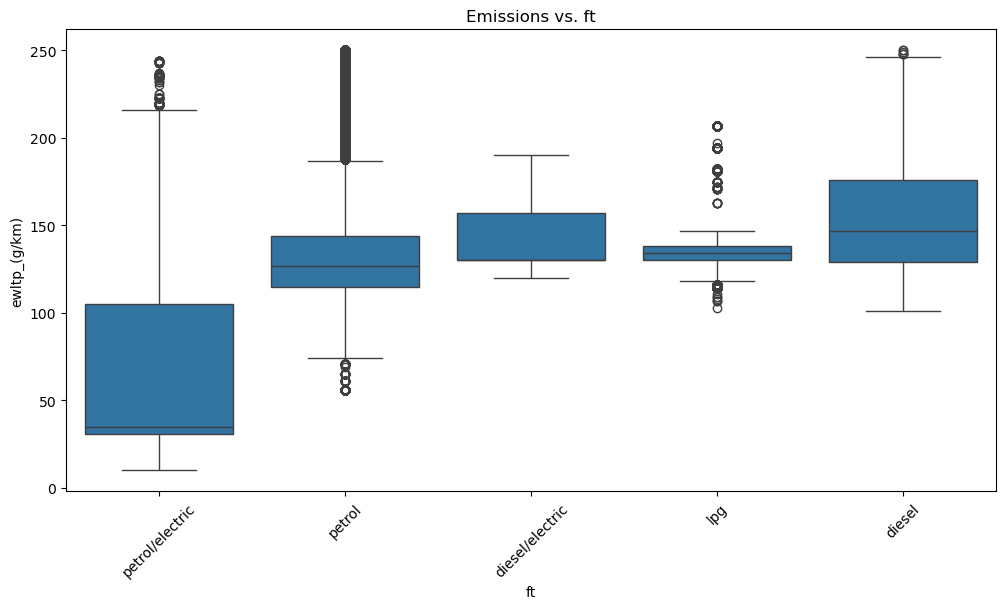

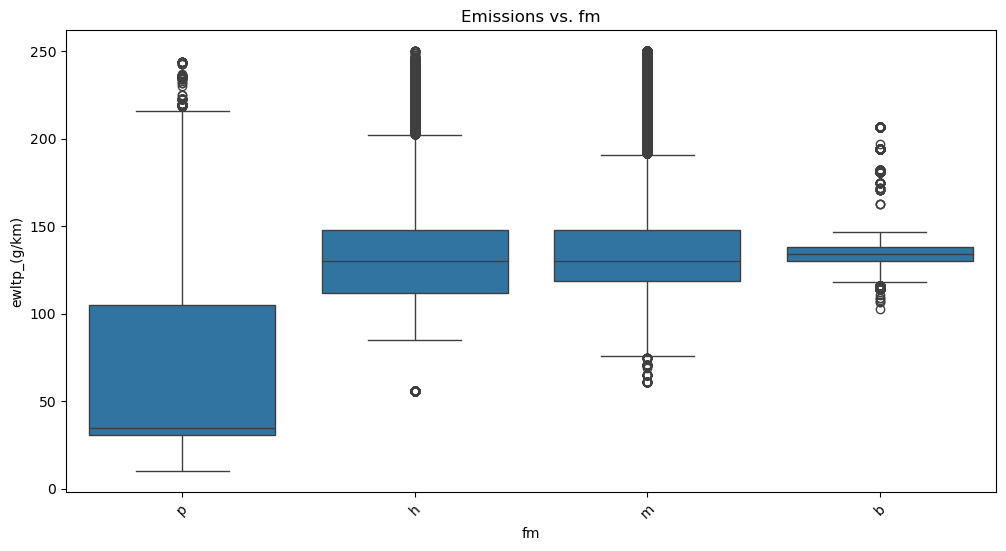

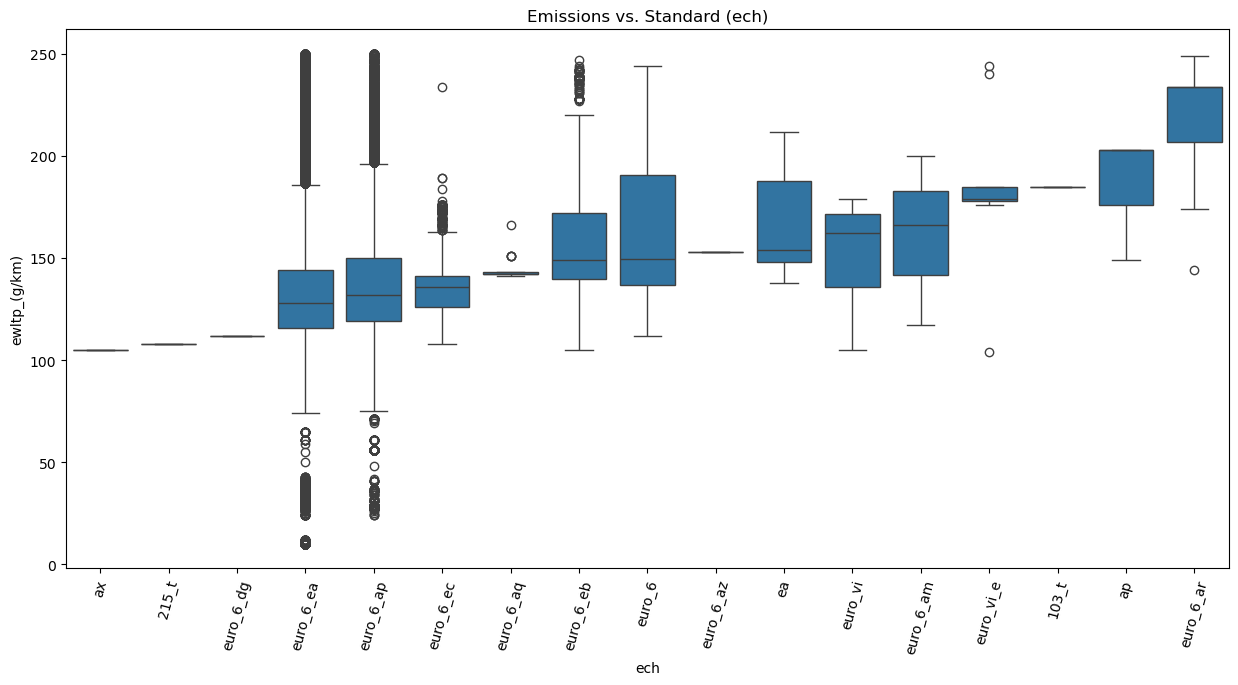

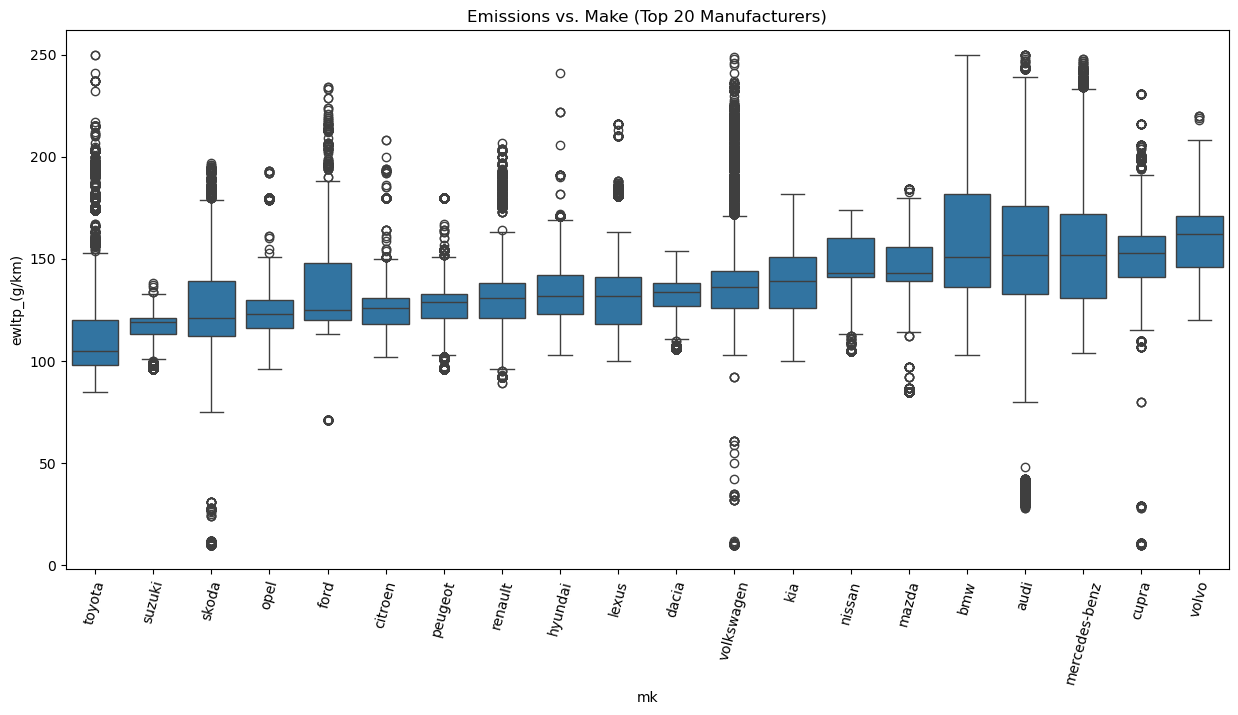

In [12]:
low_card_feats = ['ft', 'fm'] 
for col in low_card_feats:
    plt.figure(figsize=(12, 6))
    order = select_df.groupby(col)[target].median().sort_values().index
    sns.boxplot(data=select_df, x=col, y=target, order=order)
    plt.title(f'Emissions vs. {col}')
    plt.xticks(rotation=45)
    plt.show()

plt.figure(figsize=(15, 7))
order_ech = select_df.groupby('ech')[target].median().sort_values().index
sns.boxplot(data=select_df, x='ech', y=target, order=order_ech)
plt.title('Emissions vs. Standard (ech)')
plt.xticks(rotation=75)
plt.show()

plt.figure(figsize=(15, 7))
top_20_mk = select_df['mk'].value_counts().head(20).index
plot_df_mk = select_df[select_df['mk'].isin(top_20_mk)]
order_mk = plot_df_mk.groupby('mk')[target].median().sort_values().index

sns.boxplot(data=plot_df_mk, x='mk', y=target, order=order_mk)
plt.title('Emissions vs. Make (Top 20 Manufacturers)')
plt.xticks(rotation=75)
plt.show()

**Observations:**
* `ft` (fuel type): There are clear differences. 'petrol/electric' has lower median emissions than 'petrol'.
* `fm` (fuel mode): 'h' (hybrid) and 'm' (monofuel) show different emission profiles.
* `ech` (standard): There's a visible trend, though not perfectly linear. Newer standards like 'euro_6_ea' seem associated with a wide range but lower median than some older ones.
* `mk` (make): There is a *very* clear difference in emissions between manufacturers, from brands with low-emission models (like toyota, lexus) to high-performance brands (like porsche, maserati). This shows 'mk' is a very predictive feature and confirms why `TargetEncoder` works well here.

## 8. Analysis of Ignored Features

In [13]:
print("--- Analysis of 't' column")
print(f"Cardinality of 't': {df_cleaned['t'].nunique()}")
print("Top 10 most frequent 't' values:")
print(df_cleaned['t'].value_counts().head(10))

--- Analysis of 't' column
Cardinality of 't': 319
Top 10 most frequent 't' values:
t
nx             19270
xpb1f(m)       15491
ze1he(eu_m)    15072
djf            14819
ze1ee(eu_m)    14318
nq5e           14116
xpa1f(eu_m)    13648
nw             13620
cd             13594
u              13269
Name: count, dtype: int64


**Observation:**
* The 't' column has **319** unique values. This cardinality is very high. It was wise to drop it from the final preprocessor. One-hot encoding would create too many features, and target encoding would be highly prone to overfitting.

In [14]:
print("\n--- Columns with >90% Missing Values")
missing_pct = df.isnull().sum() / len(df)
print(missing_pct[missing_pct > 0.9].sort_values(ascending=False))


--- Columns with >90% Missing Values
mms                    1.000000
enedc_(g/km)           1.000000
w_(mm)                 1.000000
at1_(mm)               1.000000
at2_(mm)               1.000000
ernedc_(g/km)          1.000000
de                     1.000000
rlfi                   1.000000
vf                     1.000000
electric_range_(km)    1.000000
z_(wh/km)              0.995045
dtype: float64


**Observation:**
* These empty columns where stored in `nan` and got removed from the data. Because it would be impossible to train our model without external data.

## 9. Conclusion

This EDA confirms the modeling choices made in `notebook.ipynb`:

1.  **Target:** The target variable `ewltp_(g/km)` is suitable for regression tasks.
2.  **Feature Dropping:** Dropping columns with >90% NaN values was necessary. Dropping the high-cardinality 't' feature was a good decision to prevent overfitting and high dimensionality.
3.  **Imputation:** The numerical features (`mt`, `ec_(cm3)`, `ep_(kw)`) and one categorical feature (`ech`) have a small number of missing values, justifying the `SimpleImputer` steps.
4.  **Scaling:** Numerical features are on vastly different scales, making `StandardScaler` essential for many models (though less critical for LightGBM, it's still good practice).
5.  **Encoding:** The mixed-encoding strategy was perfect:
    * `OneHotEncoder` for low-cardinality features (`ft`, `fm`).
    * `TargetEncoder` for the high-cardinality 'mk' and 'ech' feature, which shows a strong relationship with the target.
6.  **Feature Importance:** The numerical features (`ep_(kw)`, `ec_(cm3)`, `m_(kg)`, `fuel_consumption_`) and the categorical feature `mk` all show strong relationships with the target, indicating they are valuable predictors.